In [1]:
%pip install pandas statsmodels matplotlib seaborn openpyxl

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
files = ["../VolumeWeekly2020.xlsx", "../VolumeWeekly2021.xlsx",
         "../VolumeWeekly2022.xlsx", "../VolumeWeekly2023.xlsx"]

dataframes = [pd.read_excel(file) for file in files]

In [3]:
dataframes[2].tail(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
56,NaN,52.0,13800.85,29710.91,433372.55,63518.49,22082.42,229603.32,150.00,102727.43,10494.04,12958.21,137832.05,54625.16,233521.83,1344395.43,1344395.43
57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,Summary,NaN,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,Cleared Volume,MCV
60,Total,NaN,471153.83,1527217.22,11856034.02,2580281.44,2674740.29,10398353.45,168930.57,6655521.22,635451.53,1106508.81,5296740.38,1334853.57,8899010.31,53604729.81,53678812.25
61,RTC,NaN,53.79,174.34,1353.43,294.55,305.34,1187.03,19.28,759.76,72.54,126.31,604.65,152.38,1015.87,6119.26,6127.72
62,Evening,NaN,52.75,156.69,1143.79,310.30,469.30,578.69,53.61,846.80,73.97,75.72,747.17,185.53,1225.65,5919.94,5929.52
63,Day,NaN,36.79,171.39,1613.26,351.39,153.63,1419.89,0.04,710.79,79.39,98.67,558.35,131.09,993.03,6317.72,6325.46
64,Night,NaN,74.85,184.76,1115.55,225.28,259.74,1055.77,16.71,832.70,64.05,156.82,513.82,145.84,867.56,5513.45,5519.17
65,Morning,NaN,48.21,187.74,1629.47,292.70,404.66,1921.73,5.97,587.26,73.26,197.20,630.85,151.37,1000.71,7131.13,7143.94


In [4]:
columns = dataframes[0].iloc[4,:].to_list()
columns[0] = "Year"
columns[1] = "Week"
columns

['Year',
 'Week',
 'A1',
 'A2',
 'E1',
 'E2',
 'N1',
 'N2',
 'N3',
 'S1',
 'S2',
 'S3',
 'W1',
 'W2',
 'W3',
 'Cleared Volume',
 'MCV']

In [5]:
for df in dataframes:
    df.replace(to_replace='-',value=0,inplace=True)
    df.drop(labels=[0,1,2,3,4]+list(range(df.shape[0]-9,df.shape[0])), inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.columns = columns
    # df['Year'] = df['Year'].fillna(df['Year'][0])
    df.iloc[:,0].fillna(df.iloc[0,0],inplace=True)

dtypes = {"Week": np.int32}
dtypes.update({key: np.float64 for key in columns[2:]})

dataframes = [df.astype(dtype=dtypes) for df in dataframes]

In [6]:
areas = {
    "A1":"North East Region",
    "A2":"North East Region",
    "N1":"North Region",
    "N2":"North Region",
    "N3":"North Region",
    "S1":"South Region",
    "S2":"South Region",
    "S3":"South Region",
    "E1":"East Region",
    "E2":"East Region",
    "W1":"West Region",
    "W2":"West Region",
    "W3":"West Region",
}


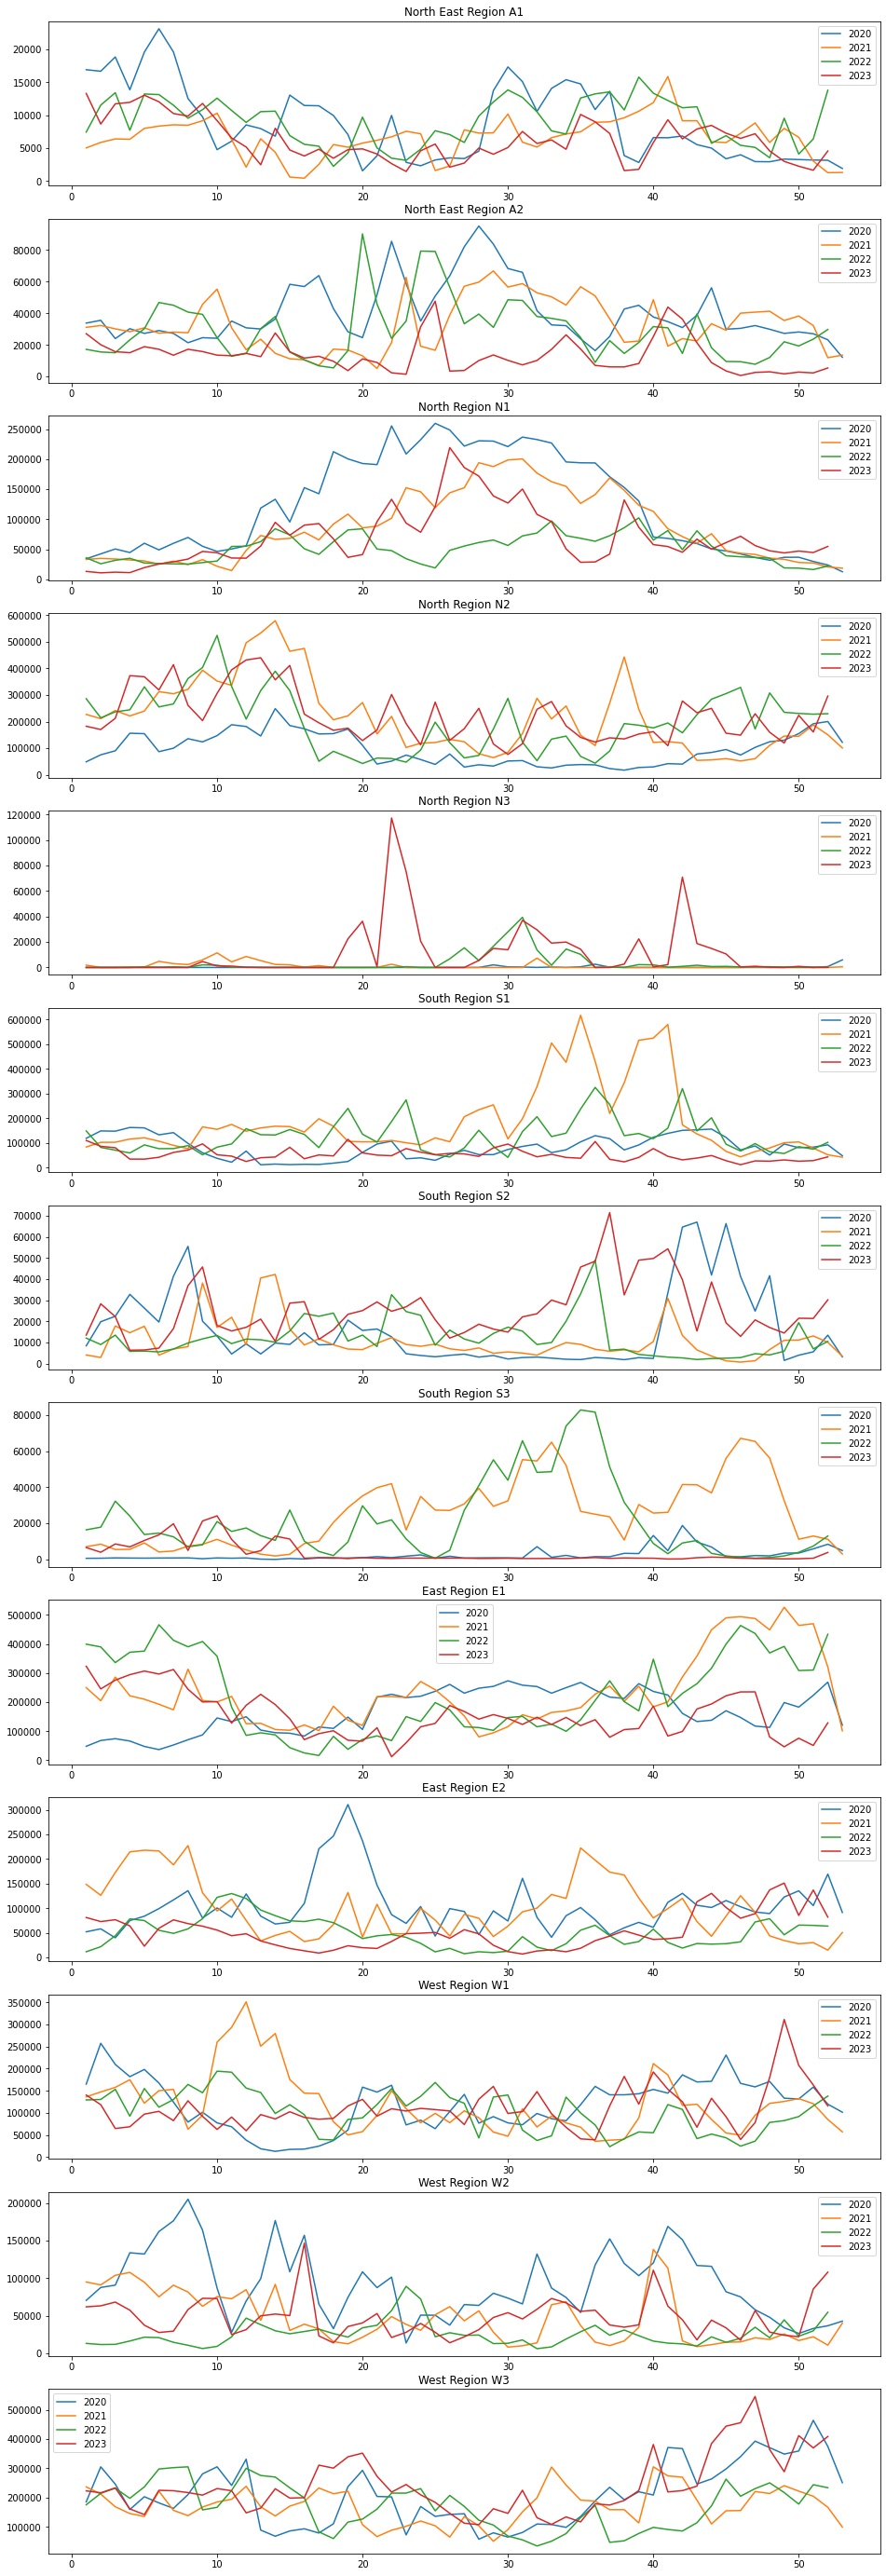

In [7]:
fig, ax = plt.subplots(nrows=len(areas), ncols=1, figsize=(16,50))
for index, (area, region) in enumerate(areas.items()):
    
    # ax[index].plot(dataframes[0].loc[:, "Week"], dataframes[0].loc[:,area], label="2019")
    ax[index].plot(dataframes[0].loc[:, "Week"], dataframes[0].loc[:,area], label="2020")
    ax[index].plot(dataframes[1].loc[:, "Week"], dataframes[1].loc[:,area], label="2021")
    ax[index].plot(dataframes[2].loc[:, "Week"], dataframes[2].loc[:,area], label="2022")
    ax[index].plot(dataframes[3].loc[:, "Week"], dataframes[3].loc[:,area], label="2023")
    ax[index].set_title(f"{region} {area}")
    ax[index].legend()
plt.show()

In [8]:
dataframe = pd.concat(dataframes,ignore_index=True)

In [9]:
dataframe

,Year,Week,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,Cleared Volume,MCV
0,2020,1,16911.93,33756.53,48253.47,51912.76,34120.12,48682.29,0.00,118862.33,8394.66,604.80,164894.79,70374.62,185102.58,781869.95,788121.16
1,2020,2,16678.16,35520.72,68177.88,57986.37,42388.81,75084.86,0.00,148760.74,19815.62,650.20,257190.84,87611.24,304985.01,1114849.33,1129493.91
2,2020,3,18848.19,23953.29,74396.13,39749.67,50518.35,90128.99,0.00,147718.97,22392.94,832.80,209441.27,90702.62,245815.56,1014497.72,1014497.72
3,2020,4,13864.97,30214.57,66323.83,74711.48,44585.04,156190.36,0.00,162732.93,32756.68,750.60,181776.78,133732.89,159148.69,1056787.47,1056787.45
4,2020,5,19588.03,27242.09,47763.37,83659.99,60050.33,154508.37,0.00,161117.18,26246.31,695.61,198066.16,132061.48,202806.64,1113804.41,1116246.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2023,48,4577.18,2914.13,80169.43,137048.60,47513.84,159852.63,227.93,26469.49,17068.34,417.60,179920.38,28213.06,364281.09,1048672.37,1048672.37
206,2023,49,2989.25,1604.62,46530.80,150944.05,43942.68,119345.26,0.00,31532.01,14457.45,302.40,311063.74,24054.37,288337.85,1035103.09,1035103.09
207,2023,50,2256.25,2722.51,76019.21,85209.71,47038.81,223724.46,858.83,26355.28,21462.39,374.40,207342.95,22120.09,411735.96,1127219.34,1127219.34
208,2023,51,1648.15,2197.97,51152.24,136820.58,44602.43,160806.39,0.00,28714.46,21360.84,655.20,162964.95,85495.64,369652.70,1066070.02,1066070.02


In [10]:
data = []
temp_dp = []
c1 = 0
c2 = 0
bulk = 1
for i in range(1, dataframe.shape[0]+1):

    temp_dp.append(dataframe.iloc[i-1].values[2:])
    
    c1+=1
    temp = [bulk]
    if c2 == 2 and c1 == 5:
        dp = [sum(x) for x in zip(*temp_dp)]
        temp.extend(dp)
        temp_dp.clear()
        data.append(temp)
        bulk+=1
        c1 = 0
        c2 = 0
        
    elif c2 != 2 and c1 == 4:
        dp = [sum(x) for x in zip(*temp_dp)]
        temp_dp.clear()
        temp.extend(dp)
        data.append(temp)
        bulk+=1
        c1 = 0
        c2+=1

In [11]:

new_col = ['Month']
new_col.extend(dataframe.columns[2:])
new_df = pd.DataFrame(data, columns=new_col)
new_df.head()

,Month,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,Cleared Volume,MCV
0,1,66303.25,123445.11,257151.31,224360.28,171612.32,370086.50,0.0,578074.97,83359.90,2838.40,813303.68,382421.37,895051.84,3968004.47,3988900.24
1,2,74862.97,104828.98,208028.44,434917.15,238676.95,476956.27,0.0,534379.41,142714.33,3102.46,568893.78,675279.49,757637.25,4220272.12,4222713.99
2,3,37087.81,144506.05,620054.99,474525.58,326302.03,786295.16,0.0,199910.55,51569.67,2823.86,304063.81,447513.10,1247417.93,4642064.05,4657620.35
3,4,42797.94,215447.04,386198.01,469504.46,523446.95,760255.22,0.0,54273.49,42244.35,1558.74,72899.64,507490.71,325247.66,3401358.28,3401358.27
4,5,22426.57,147490.98,581634.38,940433.68,796148.85,477740.10,0.0,201199.84,61656.62,3883.37,403408.38,303068.90,844138.11,4783223.72,4783223.66


In [12]:
new_df.columns

Index(['Month', 'A1', 'A2', 'E1', 'E2', 'N1', 'N2', 'N3', 'S1', 'S2', 'S3',
       'W1', 'W2', 'W3', 'Cleared Volume', 'MCV'],
      dtype='object')

In [13]:
df_20_21 = new_df.iloc[:24]
df_22_23 = new_df.iloc[24:]


avg = df_20_21[df_20_21.columns[1:-2]].mean(skipna=True)
avg = avg.astype(int)
avg.sort_values()

# new_df.iloc[:24]

N3      3271
A1     33833
S2     58746
S3     60967
A2    159357
W2    303320
E2    447754
N1    460440
W1    520599
S1    588612
N2    680152
W3    832794
E1    870245
dtype: int32

In [14]:
e1_ts = new_df["E1"]

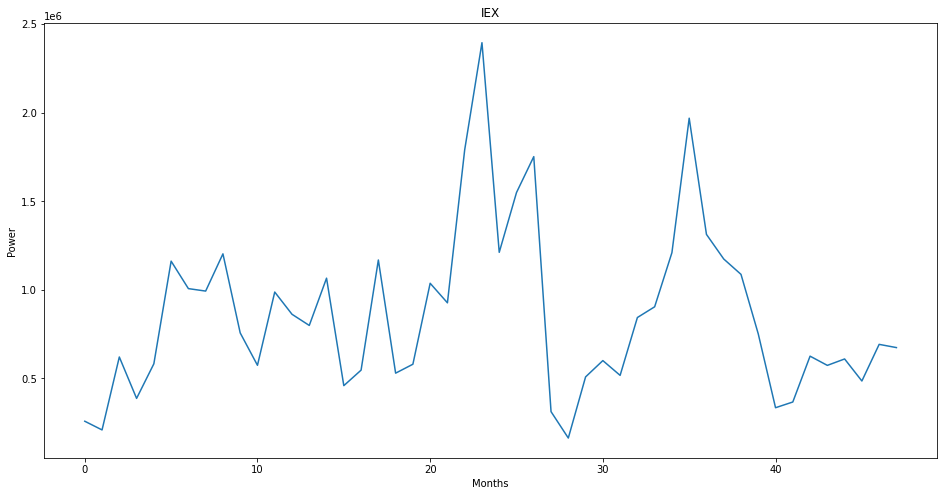

In [15]:
e1_ts.astype('float')
plt.figure(figsize=(16, 8))
plt.title('IEX')
plt.xlabel('Months')
plt.ylabel('Power')
plt.plot(e1_ts)

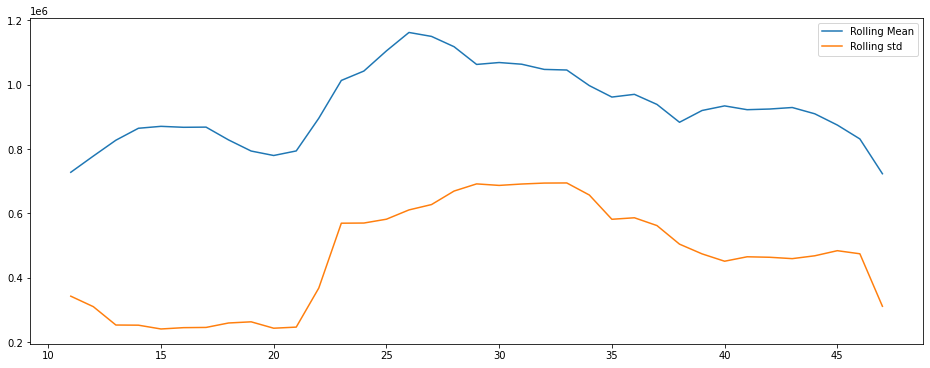

In [16]:
plt.figure(figsize=(16, 6))
plt.plot(e1_ts.rolling(window=12, center=False).mean(), label='Rolling Mean')
plt.plot(e1_ts.rolling(
    window=12, center=False).std(), label='Rolling std')
plt.legend()

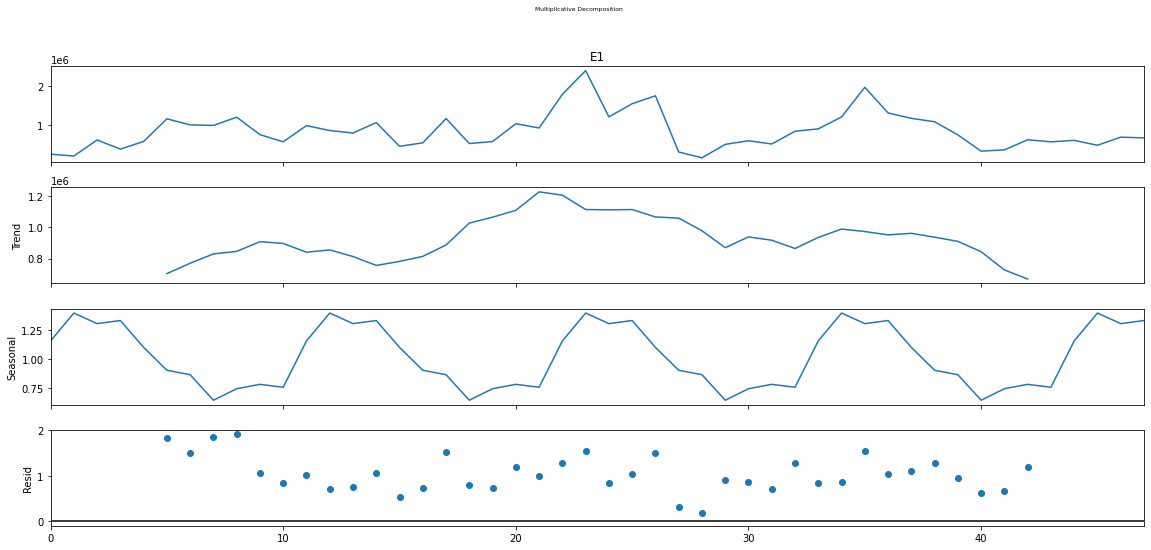

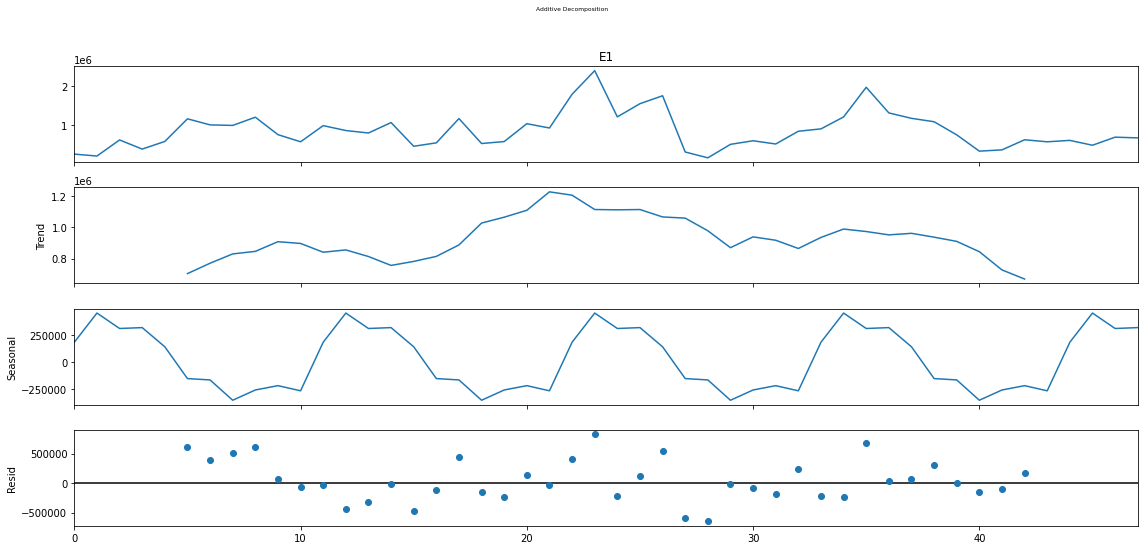

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(e1_ts, model='multiplicative', period=11)

# Additive Decomposition
additive_decomposition = seasonal_decompose(e1_ts, model='additive', period=11)

# Plot
plt.rcParams.update({'figure.figsize': (16,8)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=6)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=6)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [59]:
e1_ts_1 = df_20_21["E1"]
e1_ts_2 = df_22_23["E1"]

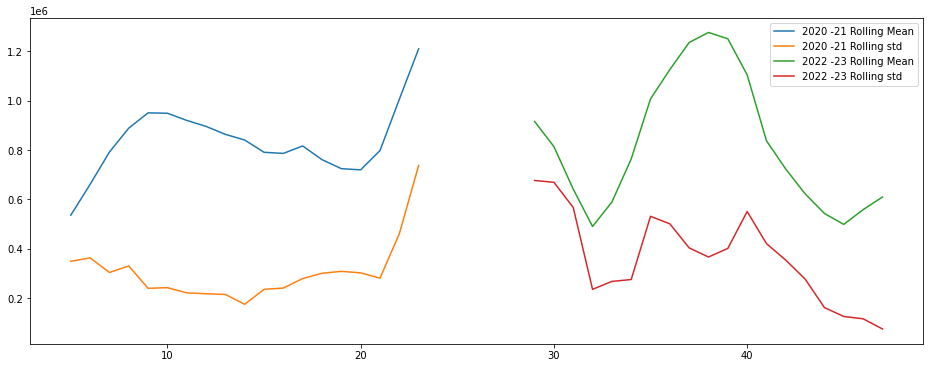

In [62]:
plt.figure(figsize=(16, 6))
plt.plot(e1_ts_1.rolling(window=6, center=False).mean(), label='2020 -21 Rolling Mean')
plt.plot(e1_ts_1.rolling(
    window=6, center=False).std(), label='2020 -21 Rolling std')
plt.plot(e1_ts_2.rolling(window=6, center=False).mean(), label='2022 -23 Rolling Mean')

plt.plot(e1_ts_2.rolling(
    window=6, center=False).std(), label='2022 -23 Rolling std')
plt.legend()

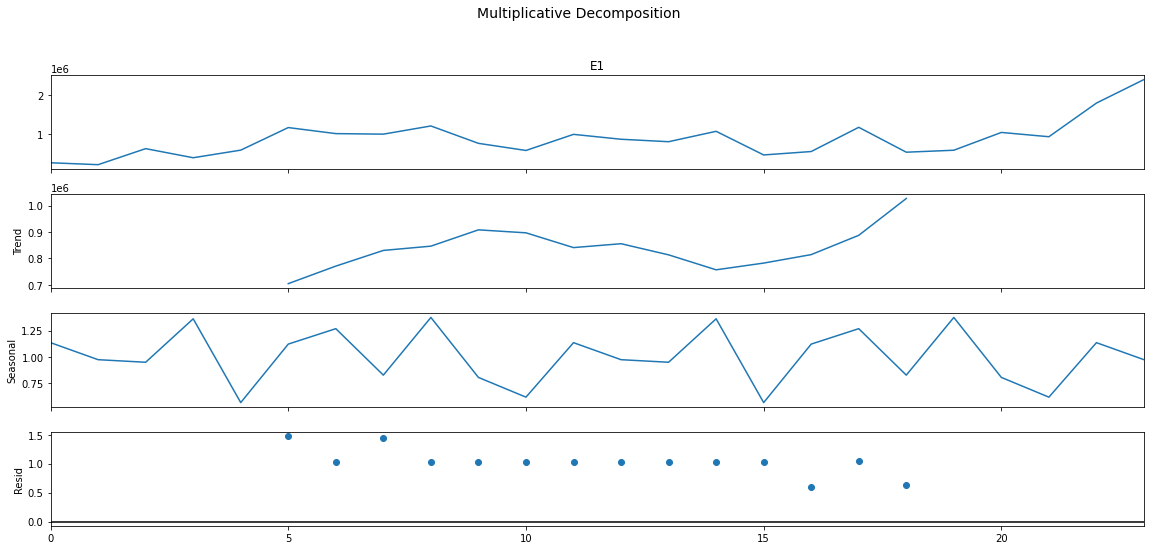

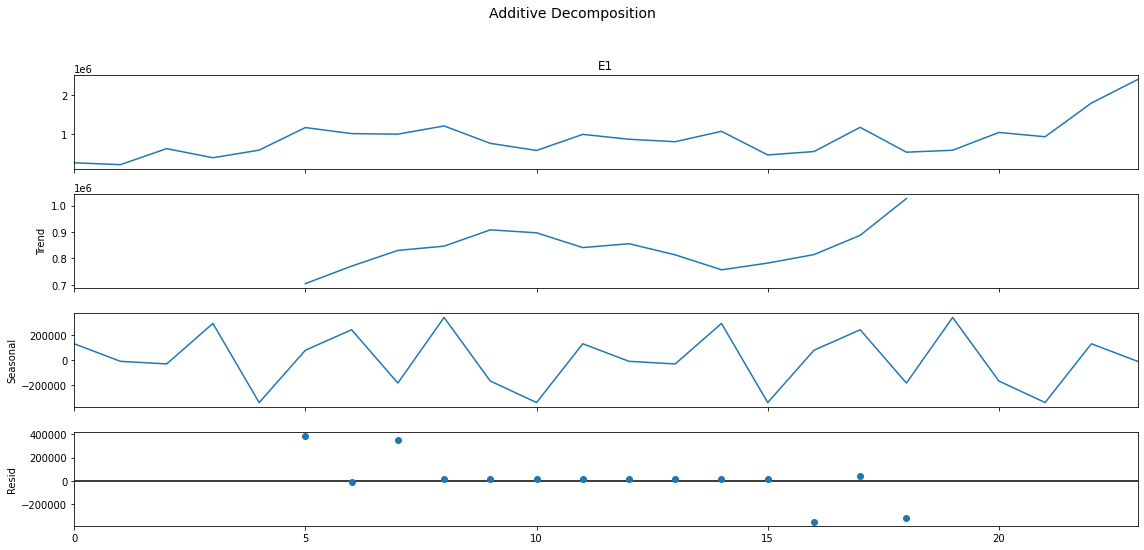

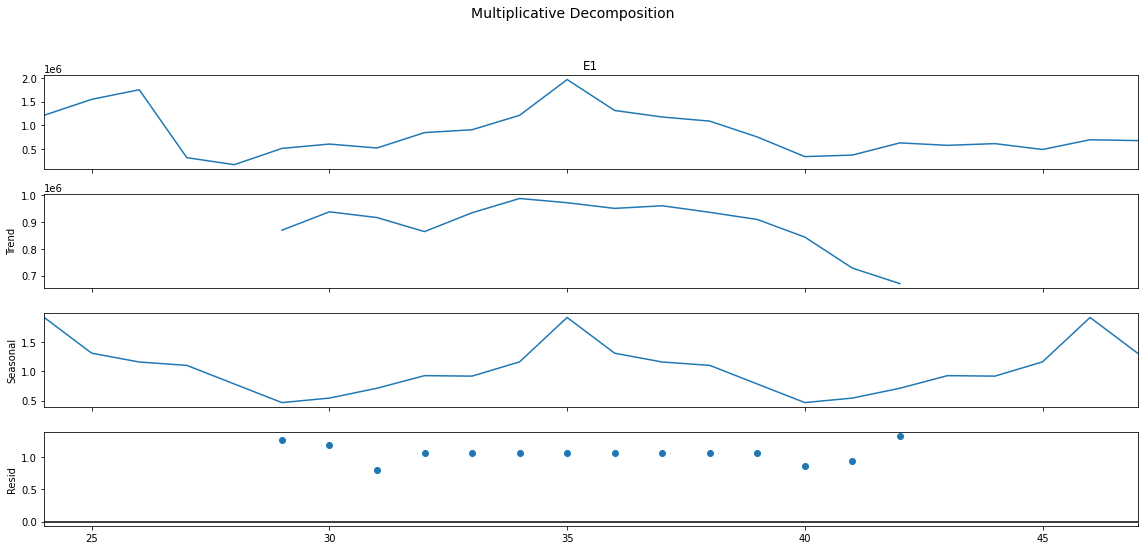

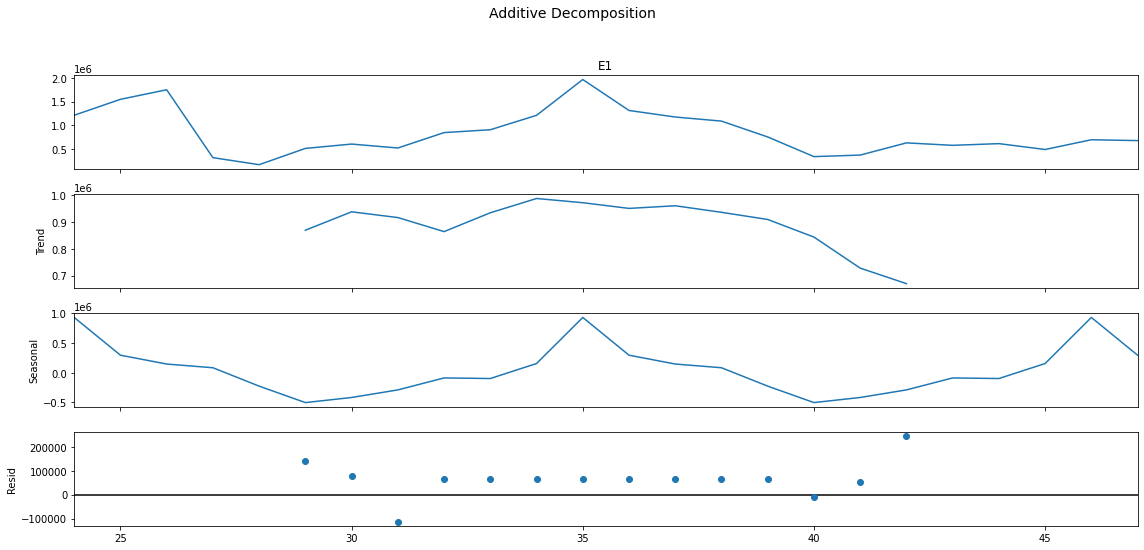

In [66]:
# Multiplicative Decomposition 2020 -21 
multiplicative_decomposition_1 = seasonal_decompose(e1_ts_1, model='multiplicative', period=11)

# Additive Decomposition 2020 -21
additive_decomposition_1 = seasonal_decompose(e1_ts_1, model='additive', period=11)

# Multiplicative Decomposition 2022 -23
multiplicative_decomposition_2 = seasonal_decompose(e1_ts_2, model='multiplicative', period=11)

# Additive Decomposition2022 -23
additive_decomposition_2 = seasonal_decompose(e1_ts_2, model='additive', period=11)

# Plot
plt.rcParams.update({'figure.figsize': (16,8)})
multiplicative_decomposition_1.plot().suptitle('Multiplicative Decomposition', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition_1.plot().suptitle('Additive Decomposition', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

multiplicative_decomposition_2.plot().suptitle('Multiplicative Decomposition', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition_2.plot().suptitle('Additive Decomposition', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=len(areas), ncols=1, figsize=(16,20))
for index, (area, region) in enumerate(areas.items()):
    ax[index].plot(new_df.loc[:, "Month"], new_df.loc[:,area], label="2020 - 2023")
    ax[index].set_title(f"{region} {area}")
    ax[index].legend()

plt.show()

In [14]:

# for month in range(1,new_df.shape[0]+1):
#     print(month)

In [94]:
dataframe.head()

,Year,Week,A1,A2,E1,E2,N1,N2,N3,S1,S2,S3,W1,W2,W3,Cleared Volume,MCV
0,2020,1,16911.93,33756.53,48253.47,51912.76,34120.12,48682.29,0.0,118862.33,8394.66,604.80,164894.79,70374.62,185102.58,781869.95,788121.16
1,2020,2,16678.16,35520.72,68177.88,57986.37,42388.81,75084.86,0.0,148760.74,19815.62,650.20,257190.84,87611.24,304985.01,1114849.33,1129493.91
2,2020,3,18848.19,23953.29,74396.13,39749.67,50518.35,90128.99,0.0,147718.97,22392.94,832.80,209441.27,90702.62,245815.56,1014497.72,1014497.72
3,2020,4,13864.97,30214.57,66323.83,74711.48,44585.04,156190.36,0.0,162732.93,32756.68,750.60,181776.78,133732.89,159148.69,1056787.47,1056787.45
4,2020,5,19588.03,27242.09,47763.37,83659.99,60050.33,154508.37,0.0,161117.18,26246.31,695.61,198066.16,132061.48,202806.64,1113804.41,1116246.21


In [95]:
dataframe["N1"].describe()

count       210.000000
mean      82958.764381
std       61812.962470
min       10848.920000
25%       36405.935000
50%       60633.250000
75%      111899.942500
max      259445.370000
Name: N1, dtype: float64

In [96]:
ts = dataframe["N1"]

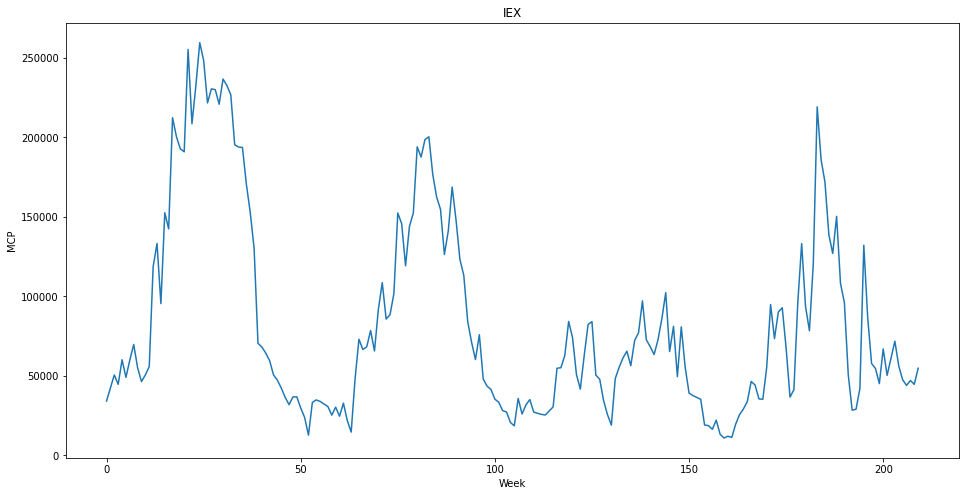

In [97]:
ts.astype('float')
plt.figure(figsize=(16, 8))
plt.title('IEX')
plt.xlabel('Week')
plt.ylabel('MCP')
plt.plot(ts)

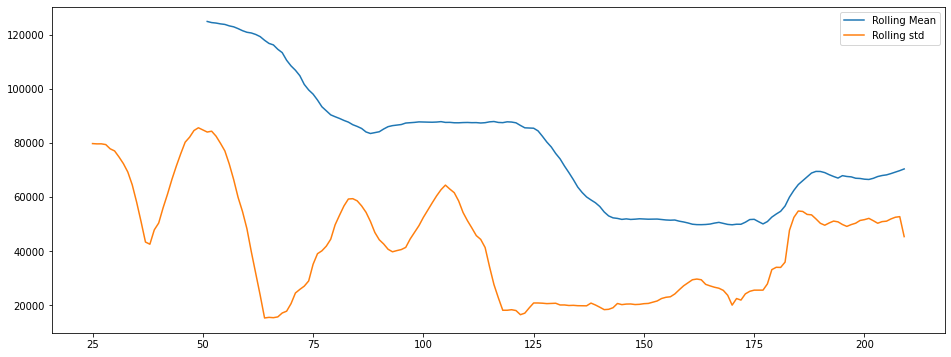

In [98]:
plt.figure(figsize=(16, 6))
plt.plot(ts.rolling(window=52, center=False).mean(), label='Rolling Mean')
plt.plot(ts.rolling(
    window=26, center=False).std(), label='Rolling std')
plt.legend()

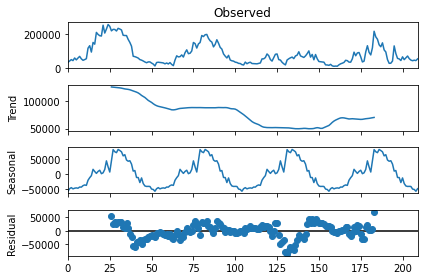

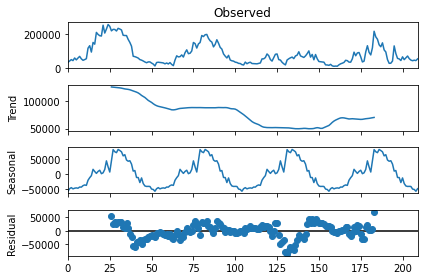

In [99]:
res = sm.tsa.seasonal_decompose(ts.values, period=52)
res.plot()

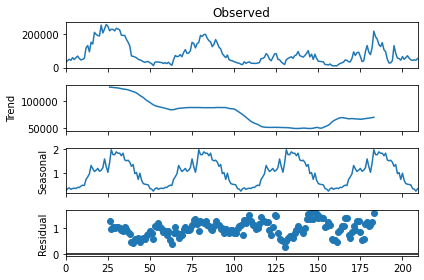

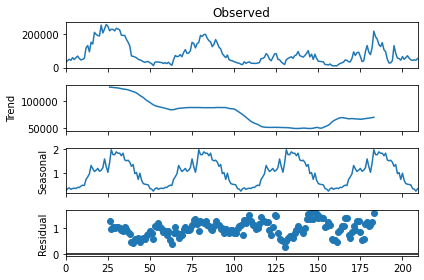

In [100]:
res = sm.tsa.seasonal_decompose(ts.values, period=52,model="multiplicative")
res.plot()

In [101]:
# Stationarity tests
def test_stationarity(timeseries):

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = sm.tsa.adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=[
                         'Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                  -3.164387
p-value                          0.022141
#Lags Used                       7.000000
Number of Observations Used    202.000000
Critical Value (1%)             -3.463144
Critical Value (5%)             -2.875957
Critical Value (10%)            -2.574455
dtype: float64


In [102]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

[]

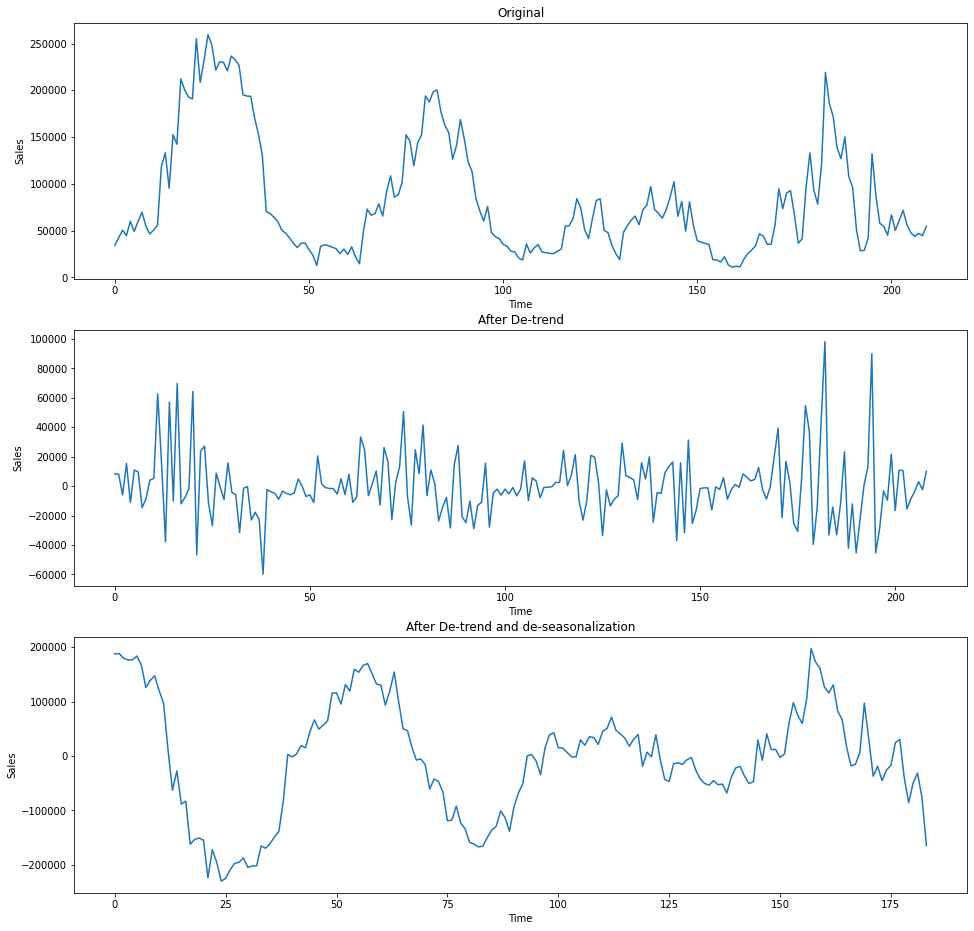

In [103]:
plt.figure(figsize=(16, 16))
plt.subplot(311)
plt.title('Original')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts)
plt.subplot(312)
plt.title('After De-trend')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts = difference(ts)
plt.plot(new_ts)
plt.plot()

plt.subplot(313)
plt.title('After De-trend and de-seasonalization')
plt.xlabel('Time')
plt.ylabel('Sales')
new_ts = difference(ts, 26)       # assuming the seasonality is 52 weeks long
plt.plot(new_ts)
plt.plot()

In [104]:
# now testing the seasonality again
test_stationarity(new_ts)

Results of Dickey-Fuller Test:
Test Statistic                  -4.397679
p-value                          0.000300
#Lags Used                       8.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64


In [105]:
new_ts.describe()

count       184.000000
mean      -6588.729293
std      103718.967139
min     -229679.950000
25%      -63694.960000
50%       -1680.440000
75%       52151.222500
max      197048.790000
dtype: float64